# **Prediction using Unsupervised ML**

**From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.**


# ***Y Nithin Sameer***

Clustering using Kmeans algorithm from sci-kit. Optimal cluster determined using Elbow method.Visualized using matplotlib and seaborn python library.

# **-> Importing the modules**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# **->Importing the Data**

In [12]:
iris = datasets.load_iris()
dataframe = pd.DataFrame(iris.data, columns = iris.feature_names)
dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# **->Taking Care of missing data**

In [13]:
dataframe.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

**->There is no missing data**

In [14]:
dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
dataframe.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

**-> Randomizing the dataset**

In [17]:
dataframe = dataframe.sample(n=len(dataframe), random_state=0)
dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [18]:
X = dataframe.iloc[: , :].values

**-> Fitting the values for 12 clusters to plot the elbow graph**

In [19]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,13):
  kmeans = KMeans(n_clusters = i , init = 'k-means++', random_state = 1)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# **-> Elbow Method**

-> Plotting a graph of WCSS vs Clusters to obtain the optimal number of cluster needed.


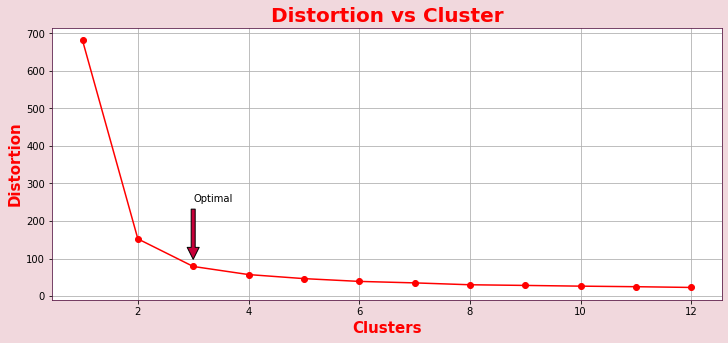

In [35]:
plt.figure(figsize=(12,5))
plt.plot(range(1,13) , wcss,c = 'r', marker='o')
plt.title('Distortion vs Cluster', c = 'r', fontsize=20, fontweight='bold')
plt.xlabel('Clusters', c = 'r', fontweight='bold', fontsize=15)
plt.ylabel('Distortion', c = 'r', fontweight='bold', fontsize=15)
plt.annotate('Optimal', xy=(3, 90), xytext=(3, 250), arrowprops=dict(facecolor='#c70039', shrink=0.05))
plt.grid(True)
plt.show()

**-> As we can see from the above graph, the optimal number of clusters is 3**

In [36]:
global Clusters
Clusters = 3

In [37]:
kmeans = KMeans(n_clusters = Clusters , init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# **-> Visualizing**

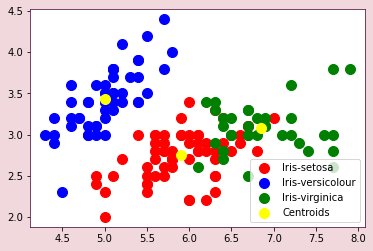

In [41]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

**-> The 3 different clusters are displayed using 3 colors**